In [7]:
import pandas as pd
df = pd.read_csv("../data/train.csv")
df.head()
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

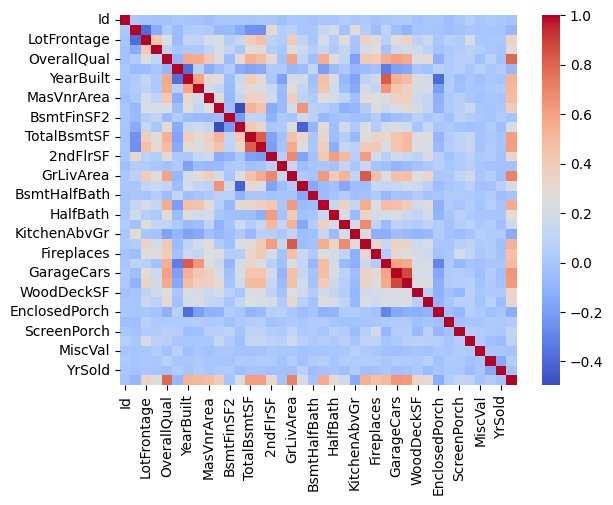

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['SalePrice'])
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")

In [16]:
df.isnull().sum().sort_values(ascending=False).head(10)
cols_to_drop = ['PoolQC', 'Alley', 'Fence', 'MiscFeature']
existing_cols = [col for col in cols_to_drop if col in df.columns]
df = df.drop(columns=existing_cols)

df = df.fillna(df.mean(numeric_only=True))



In [18]:
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']]  # example
y = df['SalePrice']


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
rf = RandomForestRegressor()

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

print("LinearReg MAE:", mean_absolute_error(y_test, lr.predict(X_test)))
print("RandomForest MAE:", mean_absolute_error(y_test, rf.predict(X_test)))


LinearReg MAE: 25024.537178467388
RandomForest MAE: 21299.504440820067


In [22]:
import joblib
joblib.dump(rf, '../app/model.joblib')


['../app/model.joblib']